# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
data = pd.read_csv('previsao_de_renda.csv')
data.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [11]:
# cópia do DataFrame sem as colunas index, mau e unnamed.
datadrop = data.drop(['index', 'mau', 'Unnamed: 0'], axis=1).copy()


C:\Users\chris\AppData\Local\Temp\ipykernel_27476\168878994.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(datadrop.corr(), figsize=(10, 10), center = 0, cmap=cmap)


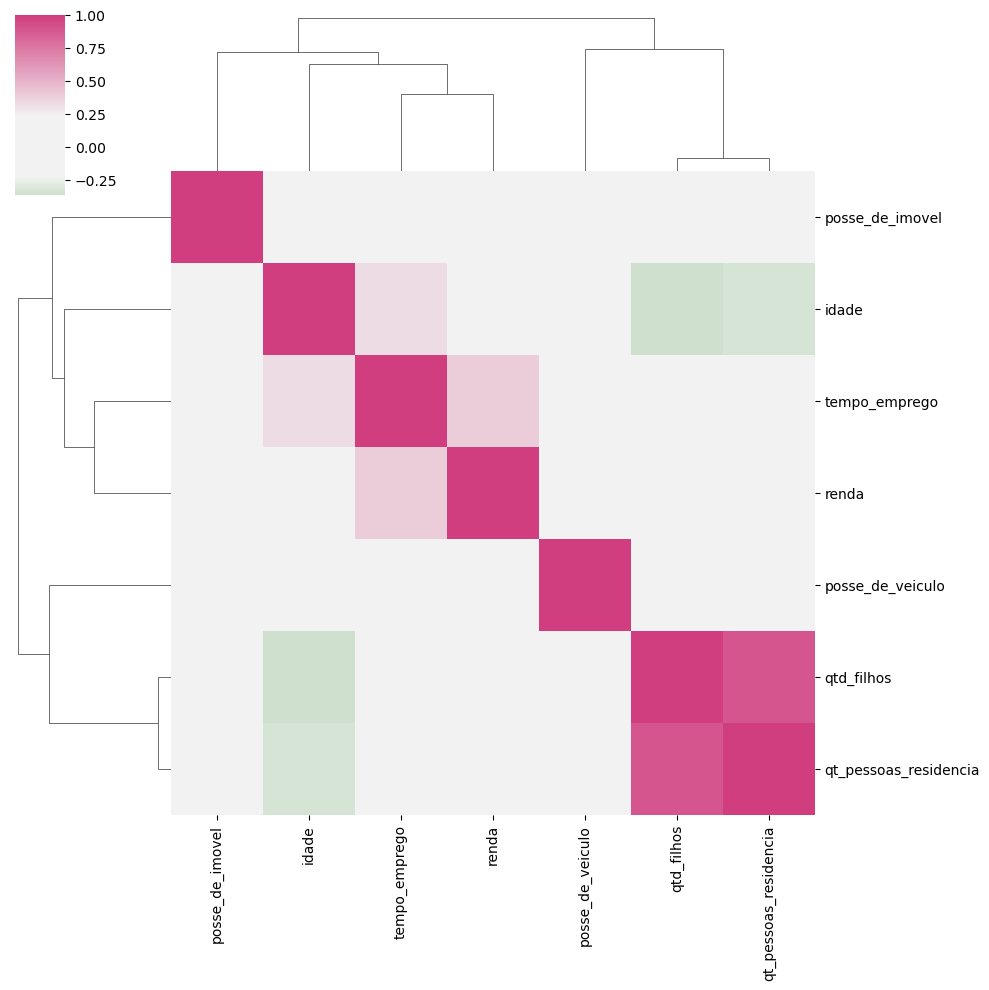

In [12]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')

sns.clustermap(datadrop.corr(), figsize=(10, 10), center = 0, cmap=cmap)

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

In [13]:
N = 500
x = data['renda']
y = data['tempo_emprego']
datadrop = pd.DataFrame({'x':x, 'y':y})
datadrop.corr()

,x,y
x,1.000000,0.394235
y,0.394235,1.000000


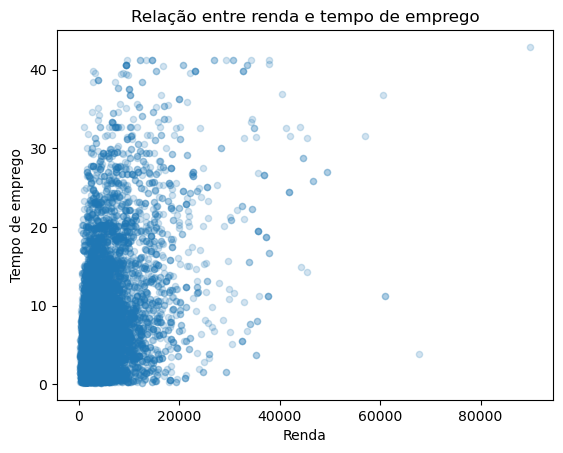

In [14]:
# Criar o gráfico de dispersão com ajustes
plt.scatter(x, y, alpha=0.2, s=20)
plt.xlabel('Renda')
plt.ylabel('Tempo de emprego')
plt.title('Relação entre renda e tempo de emprego')

# Exibir o gráfico
plt.show()

In [ ]:
y1 = data['tipo_residencia']
datadrop.corr()

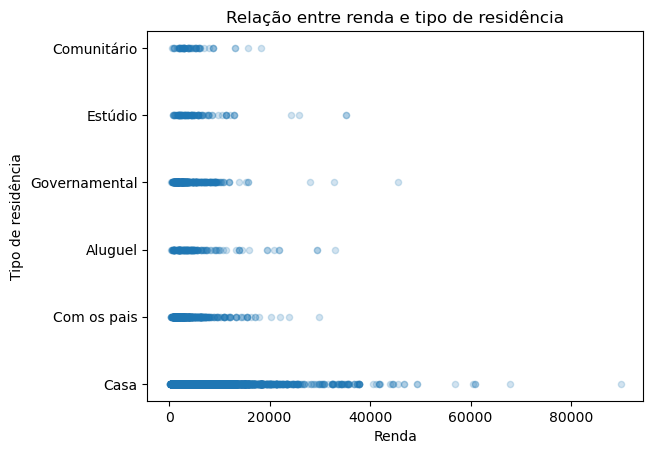

In [21]:
y1 = data['tipo_residencia']

# Criar o gráfico de dispersão com ajustes
plt.scatter(x, y1, alpha=0.2, s=20)
plt.xlabel('Renda')
plt.ylabel('Tipo de residência')
plt.title('Relação entre renda e tipo de residência')

# Exibir o gráfico
plt.show()

3) Na sua opinião, há outliers na variável renda?

Sim, a variável renda apresenta outliers.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

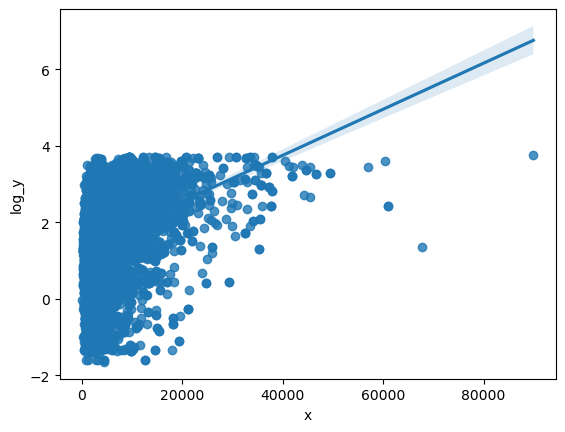

In [22]:
data_log = datadrop.copy()
data_log['log_y'] = np.log(data_log['y'])

_ = sns.regplot(x='x', y='log_y', data = data_log)

In [8]:
data_log.corr()

,x,y,log_y
x,1.000000,0.394235,0.287507
y,0.394235,1.000000,0.841079
log_y,0.287507,0.841079,1.000000


5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Eu acho que piorou.